##Tokenizer example

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
texts = ['I love playing tennis',
         'I am a fan of Rafael Nadal who play tennis',
         'I also love Roger Federer']

In [ ]:
sample_tokenizer = Tokenizer(num_words=100)
sample_tokenizer.fit_on_texts(texts)
sequence = sample_tokenizer.texts_to_sequences(texts)
print(sequence)

[[1, 2, 4, 3], [1, 5, 6, 7, 8, 9, 10, 11, 12, 3], [1, 13, 2, 14, 15]]


In [ ]:
data = pad_sequences(sequence, maxlen=8, truncating='pre', padding='pre')
data

array([[ 0,  0,  0,  0,  1,  2,  4,  3],
       [ 6,  7,  8,  9, 10, 11, 12,  3],
       [ 0,  0,  0,  1, 13,  2, 14, 15]], dtype=int32)

In [ ]:
sample_tokenizer.texts_to_sequences(['I am raghav']) #doesn't assign any number to new unseen token

[[1, 5]]

##Spam Detection with LSTM

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, Dense, GlobalMaxPooling1D, LSTM, SimpleRNN, Flatten
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split

In [ ]:
!wget https://lazyprogrammer.me/course_files/spam.csv

--2022-11-08 17:24:01--  https://lazyprogrammer.me/course_files/spam.csv
Resolving lazyprogrammer.me (lazyprogrammer.me)... 172.67.213.166, 104.21.23.210, 2606:4700:3030::ac43:d5a6, ...
Connecting to lazyprogrammer.me (lazyprogrammer.me)|172.67.213.166|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 503663 (492K) [text/csv]
Saving to: ‘spam.csv.4’

spam.csv.4          100%[===================>] 491.86K   761KB/s    in 0.6s    

2022-11-08 17:24:03 (761 KB/s) - ‘spam.csv.4’ saved [503663/503663]



In [ ]:
df = pd.read_csv('spam.csv', encoding='ISO-8859-1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [ ]:
df = df.loc[:,['v2','v1']].copy()
df.columns = ['data','label']
df['label'] = df['label'].map({'ham':0, 'spam':1})
df.head()

,data,label
0,"Go until jurong point, crazy.. Available only ...",0
1,Ok lar... Joking wif u oni...,0
2,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,U dun say so early hor... U c already then say...,0
4,"Nah I don't think he goes to usf, he lives aro...",0


In [ ]:
df_train, df_test = train_test_split(df, test_size=0.3, random_state=42)
df_train.shape, df_test.shape

((3900, 2), (1672, 2))

In [ ]:
V=10000
tokenizer = Tokenizer(num_words=V)
tokenizer.fit_on_texts(df_train['data'])
data_train = tokenizer.texts_to_sequences(df_train['data'])
data_test  = tokenizer.texts_to_sequences(df_test['data'])

In [ ]:
len(tokenizer.word_index)

7413

In [ ]:
print(max(len(x) for x in data_train))

121


In [ ]:
max_len = 100
data_train = pad_sequences(data_train, maxlen=max_len, truncating='pre', padding='pre')
data_test  = pad_sequences(data_test , maxlen=max_len, truncating='pre', padding='pre')
data_train.shape, data_test.shape

((3900, 100), (1672, 100))

In [ ]:
i = Input(shape=(max_len, ))
x = Embedding(V+1, 20)(i)
x = LSTM(15, return_sequences=True)(x)
x = GlobalMaxPooling1D()(x)
x = Dense(1, activation='sigmoid')(x)

In [ ]:
model = Model(i,x)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 100)]             0         
                                                                 
 embedding (Embedding)       (None, 100, 20)           200020    
                                                                 
 lstm (LSTM)                 (None, 100, 15)           2160      
                                                                 
 global_max_pooling1d (Globa  (None, 15)               0         
 lMaxPooling1D)                                                  
                                                                 
 dense (Dense)               (None, 1)                 16        
                                                                 
Total params: 202,196
Trainable params: 202,196
Non-trainable params: 0
_______________________________________________________

In [ ]:
model.compile(loss='binary_crossentropy', metrics='accuracy', optimizer='adam')
r = model.fit(data_train, df_train['label'], epochs=10, batch_size=64, validation_data=(data_test, df_test['label']))

Epoch 1/10
61/61 [==============================] - 5s 47ms/step - loss: 0.6026 - accuracy: 0.8000 - val_loss: 0.4513 - val_accuracy: 0.8690
Epoch 2/10
61/61 [==============================] - 2s 40ms/step - loss: 0.4201 - accuracy: 0.8646 - val_loss: 0.3893 - val_accuracy: 0.8690
Epoch 3/10
61/61 [==============================] - 2s 39ms/step - loss: 0.3413 - accuracy: 0.8646 - val_loss: 0.2823 - val_accuracy: 0.8690
Epoch 4/10
61/61 [==============================] - 2s 40ms/step - loss: 0.2483 - accuracy: 0.8646 - val_loss: 0.2272 - val_accuracy: 0.8690
Epoch 5/10
61/61 [==============================] - 2s 39ms/step - loss: 0.1956 - accuracy: 0.8644 - val_loss: 0.1915 - val_accuracy: 0.8690
Epoch 6/10
61/61 [==============================] - 2s 41ms/step - loss: 0.1557 - accuracy: 0.9600 - val_loss: 0.1609 - val_accuracy: 0.9785
Epoch 7/10
61/61 [==============================] - 2s 40ms/step - loss: 0.1251 - accuracy: 0.9949 - val_loss: 0.1365 - val_accuracy: 0.9821
Epoch 8/10
61

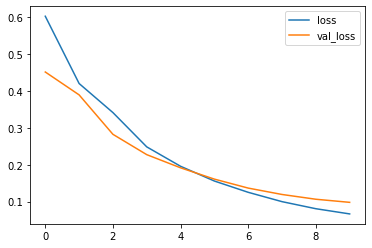

In [ ]:
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()